In [1]:
from contextlib import contextmanager
import pandas as pd
from pathlib import Path
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

@contextmanager
def unlimited_data_card():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)

    yield None

    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

/Users/gal/miniforge3/envs/sc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
FIFA_PLAYERS_DATA = list((Path.cwd() / "fifa_players_data").glob("*"))

In [3]:
FIFA_PLAYERS_DATA

[PosixPath('/Users/gal/Documents/studia/sc/PFPGA/fifa_players_data/players_21.csv'),
 PosixPath('/Users/gal/Documents/studia/sc/PFPGA/fifa_players_data/players_20.csv'),
 PosixPath('/Users/gal/Documents/studia/sc/PFPGA/fifa_players_data/players_18.csv'),
 PosixPath('/Users/gal/Documents/studia/sc/PFPGA/fifa_players_data/players_19.csv'),
 PosixPath('/Users/gal/Documents/studia/sc/PFPGA/fifa_players_data/players_17.csv'),
 PosixPath('/Users/gal/Documents/studia/sc/PFPGA/fifa_players_data/players_16.csv'),
 PosixPath('/Users/gal/Documents/studia/sc/PFPGA/fifa_players_data/players_15.csv')]

In [4]:
dataframes = []

for fifa_player_data_path, year in zip(sorted(FIFA_PLAYERS_DATA, key=lambda x: int(str(x).removesuffix(".csv").split("_")[-1])), range(15, 22)):
    df = pd.read_csv(fifa_player_data_path)
    df["year"] = year
    dataframes.append(df)

fifa_data = pd.concat(dataframes)

years = list(range(15,22))
fifa_data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,15
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,15
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,15
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,21
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,21
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2,21
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,21


In [5]:
fifa_data.shape

len(fifa_data["short_name"].unique())

38843

In [6]:
fifa_data["club_name"].unique().shape

(954,)

In [7]:
import networkx as nx

graphs = {}

for idx, (year_1, year_2) in enumerate(zip(years[:-1], years[1:])):

    year_1_data = fifa_data[fifa_data["year"] == year_1]
    year_2_data = fifa_data[fifa_data["year"] == year_2]

    clubs_2 = year_2_data[["sofifa_id", "club_name"]].set_index("sofifa_id")
    clubs_1 = year_1_data[["sofifa_id", "club_name"]].set_index("sofifa_id")
    
    merged = clubs_2.join(clubs_1, how="inner", lsuffix="_last", rsuffix="_next")

    grouped = merged.reset_index().groupby(["club_name_last", "club_name_next"]).count().rename(columns={"sofifa_id": "count"}).reset_index()
    grouped = grouped[grouped.apply(lambda x: x["club_name_last"] != x["club_name_next"], axis=1)]
    graphs[idx] = nx.from_pandas_edgelist(df=grouped, source="club_name_last", target="club_name_next", edge_attr="count", create_using=nx.DiGraph())


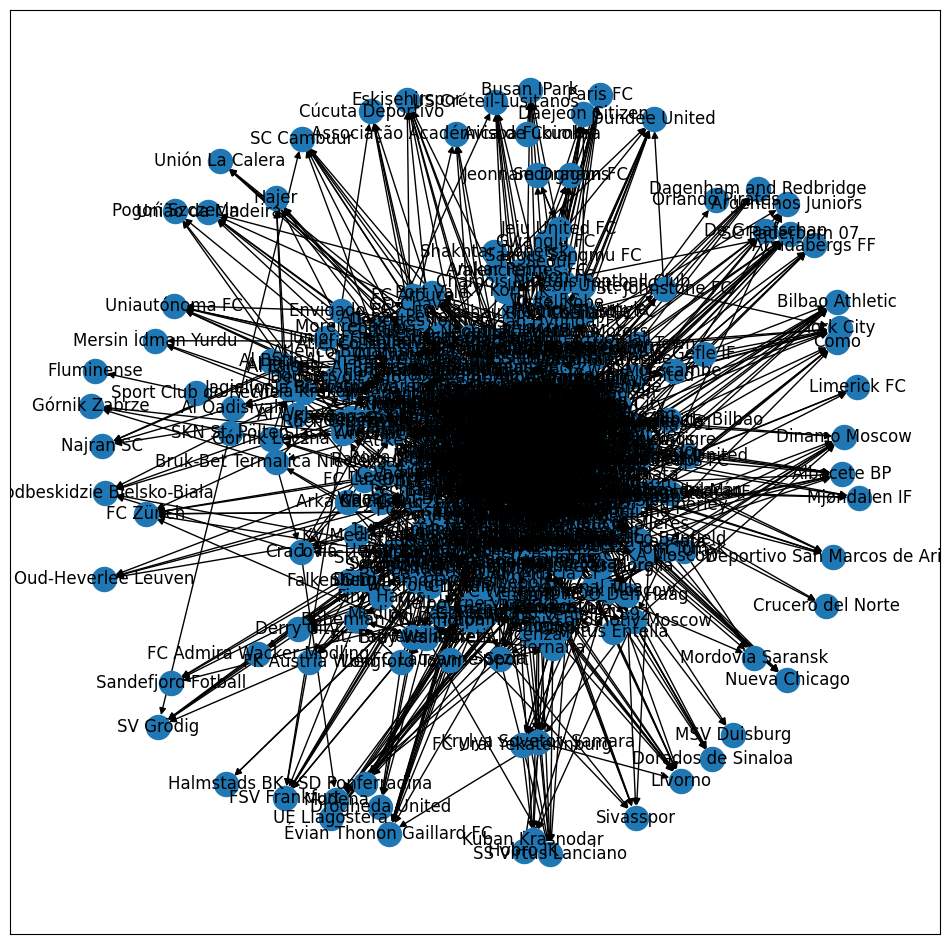

In [8]:
plt.figure(figsize=(12,12))
nx.draw_networkx(graphs[1], with_labels=True)


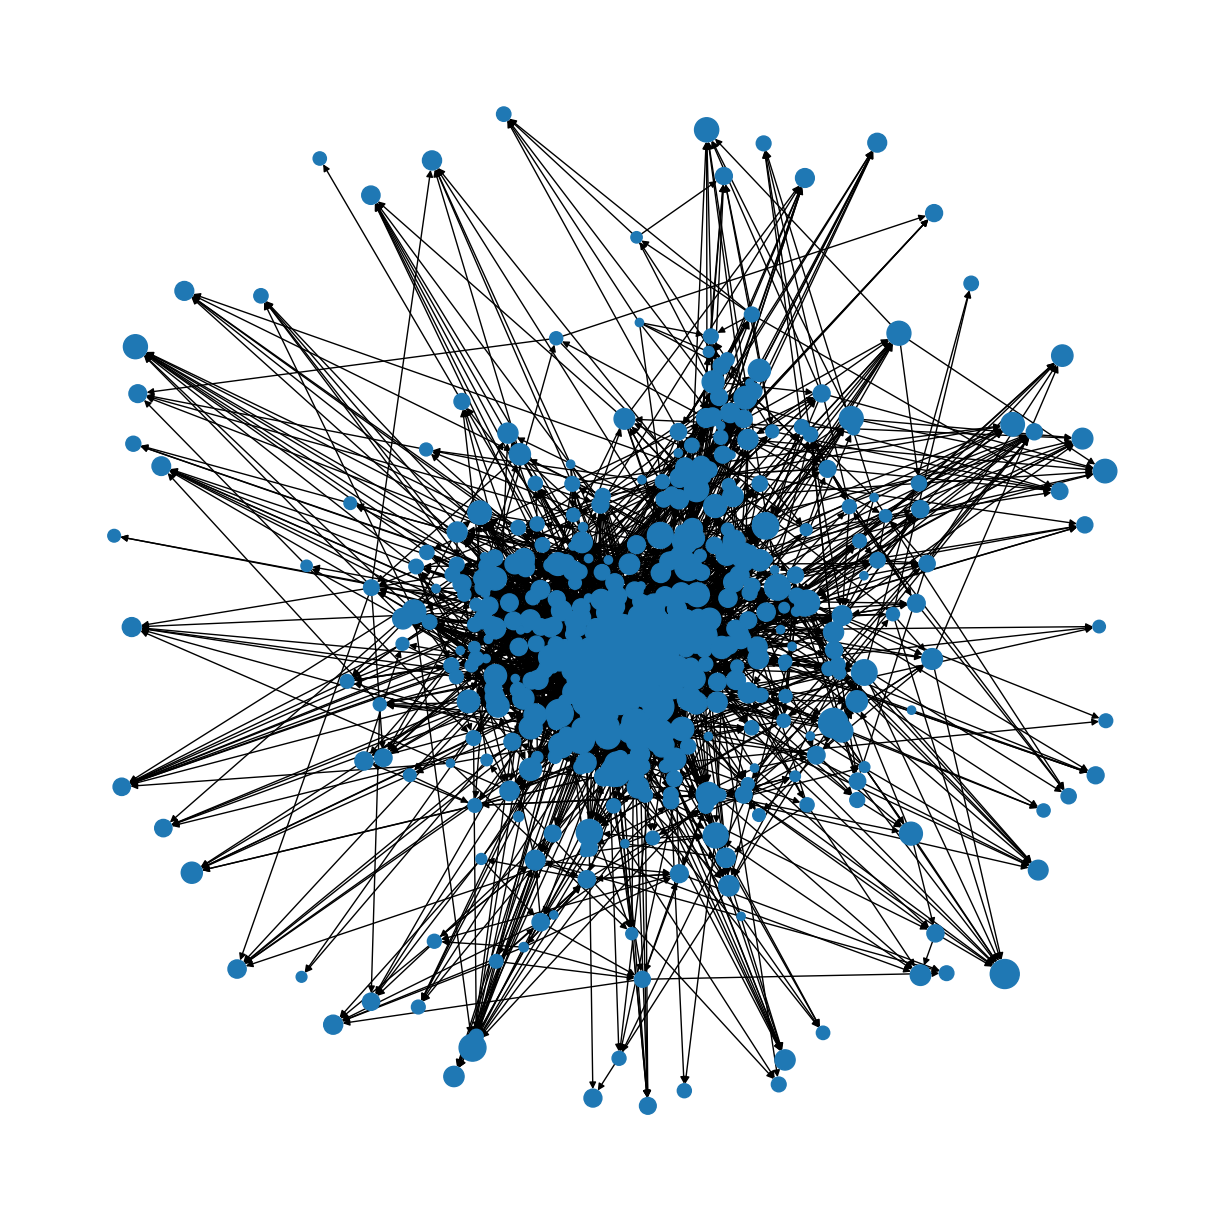

In [9]:
plt.figure(figsize=(12,12))
nx.draw(graphs[0], node_size=[rank * 100000 for rank in nx.pagerank(graphs[0]).values()], with_labels=False)

In [11]:
from pyvis.network import Network
import networkx as nx

nt = Network()
nt.from_nx(graphs[0])
nt.show('nx.html')